# TIANCHI-TrafficPredictionChallenge
                                     --designed by ChuanyuXue
---


## Description && Data
### 1. The problem introduction
>This contest is the theme of "intelligent traffic prediction in mobile Internet era", invited particitans to build an algorithm model based on Internet traffic information, accurately predict the passage time of each critical road section at some certain time, to realize the fluctuation of the traffic condition and provide desition-making for intelligent transportation system.

### 2. Data source
>This contest will provide the important attribute information of each link, the network structure between all road and each passage time in every period of the history for users to bulid algorithm model.

### 3. Data description

#### 3.1 Link attribute table
>Each direction of each road is composed of mulitple sections, and we provides the unique identification contains length, width, and road type shown in table 1.
    ![link table](https://work.alibaba-inc.com/aliwork_tfs/g01_alibaba-inc_com/tfscom/TB1jtlkSpXXXXbpXFXXXXXXXXXX.tfsprivate.png)
    ![link pic](https://work.alibaba-inc.com/aliwork_tfs/g01_alibaba-inc_com/tfscom/TB1eu_5RVXXXXcbXVXXXXXXXXXX.tfsprivate.png)

#### 3.2 Link relation table
>There is a direction relationship between each link, which provides the direct upstram link and the direct downstream link shown in table 2.
    ![link relation](https://work.alibaba-inc.com/aliwork_tfs/g01_alibaba-inc_com/tfscom/TB1qFz9RVXXXXa6XVXXXXXXXXXX.tfsprivate.png)
    ![link relation pic](https://work.alibaba-inc.com/aliwork_tfs/g01_alibaba-inc_com/tfscom/TB1UwfZRVXXXXaaaXXXXXXXXXXX.tfsprivate.png)
    
#### 3.3 Link travel time table
>Data set records every average time in different period on each link(two minutes as a time interval) as table 3.
    ![time table](https://work.alibaba-inc.com/aliwork_tfs/g01_alibaba-inc_com/tfscom/TB1rSA5SXXXXXbUaXXXXXXXXXXX.tfsprivate.png)
    
In the frist season, they provide the travel time data on Apr, May and July in 2016, and in the second season they provide similar data in 2017.
    
### 4. Contest task
#### 4.1 Target
In the frist season they just want us to predict the average travel time in [8:00-9:00] and in the second season we need to predict the average travel time in [8:00-9:00],[15:00-16:00]and[18:00-19:00].

#### 4.2 Evaluation method
This contest uses MAPE method to evaluate the submission and give a result more than zero.
> ![MAPE](https://work.alibaba-inc.com/aliwork_tfs/g01_alibaba-inc_com/tfscom/TB13g.0SXXXXXbeaXXXXXXXXXXX.tfsprivate.png)
ttp : predicted travel time submitted by participants
ttr: real travel time
N: the number of predicted links
T_i： the time interval amount of the ith link
The lower MAPE value, the higher accuracy of the model.


---
## Process
## 1. Load data
The travel time table contains about 10000000 lines, that is a little huge for my compute to deal with. Becasue i am not good at using pandas,i choose the original struct in Python dict to deal with these data.   
Fristly, i convert these data into a txt file as a ragular struct, all the data on a link is writed in a line to be load more efficiently and the data are divided by time interval in each line.If you don't use Pandas module, it can help you load the data more quickly.   
And it is very useful to change time intervel into timeID and dateID, you can make statistics or calculate more efficiently.   
dateID 0 is Mar.01


In [229]:
#use datetime module to quickly handle date and time
from datetime import datetime
def DataProcessing(inputFilePath, outputFilePath):
    dataFileIn = open(inputFilePath)
    # Skim the frist line
    dataFileIn.readline() 
    idHash = {}

    #load Data
    for line in dataFileIn:
        if line == "":
            break
        
        eachLine = line.split(';')
        linkID = eachLine[0]
        date = eachLine[1]
        timeWindow = eachLine[2]
        value = eachLine[3].replace("\n",'')
        
        #deal with time interval
        timeWindow = timeWindow.replace('[', '').split(',')
        timeWindowStart = datetime.strptime(timeWindow[0], "%Y-%m-%d %H:%M:%S")
        hour = timeWindowStart.hour
        minute = timeWindowStart.minute
        time = timeWindowStart.time()

        time = int(time.hour * 60 + time.minute)
        date = int((datetime.strptime(date, "%Y-%m-%d") - datetime.strptime("2017-03-01", "%Y-%m-%d")).days)
        #use dict to save data
        if date >= 0:
            if linkID not in idHash:
                idHash[linkID] = {}
            if time not in idHash[linkID]:
                idHash[linkID][time] = {}
            idHash[linkID][time][date] = value
    dataFileIn.close()

    #Sort Hash
    dataFileOut = open(outputFilePath, "w")
    for linkID in idHash:
        dataFileOut.writelines("\n" + linkID)
        for time in sorted(idHash[linkID].items(), key=lambda d: d[0]):
            dataFileOut.writelines("," + str(time[0]) + ":")
            for date in sorted(time[1].items(), key=lambda d: d[0]):
                value = date[1]
                dataFileOut.writelines(str(date[0]) + "-" + str(value) + ";")
            
            
    dataFileOut.close()



In [230]:
inputFile = "C:\\Users\\XueChuanyu\\Desktop\\rebulid\\final\\quaterfinal_gy_cmp_training_traveltime.txt"
outputFile = "C:\\Users\\XueChuanyu\\Desktop\\rebulid\\final\\sortedData.txt"

DataProcessing(inputFile, outputFile)

The sortedData.txt file:
    ![sortedata](http://a2.qpic.cn/psb?/V148dNCw3iaZRT/ssN2kca5Ws0VujCVSfGbpu3iDlb*LZOpudCZZSA1qGQ!/b/dD8BAAAAAAAA&bo=oAX3AqAF9wIRADc!&rf=viewer_4)

    

When you want to load dataset, you can use these code to do that.   
Ues three-dimensional dict to store data, then you can deal data with three dimension, then you can deal data in each date or in each link.    
And there is a list in the most inner dict, each list contains two elements, the frist element is original data and the second element is fixed data. This is not a smart way, but when I wrote code I found it hard to not use conference. 

In [231]:
import collections
def loadFile(filePath):
    idHash = collections.OrderedDict()
    hashFile = open(filePath)
    # to skip the frist line
    hashFile.readline()  
    #to load the data in room
    for eachLine in hashFile:
        eachTimes = eachLine.split(",")
        id = eachTimes[0]
        idHash[id] = collections.OrderedDict()

        for i in range(1, len(eachTimes)):
            tempList = eachTimes[i].split(":")
            timeID = tempList[0]
            eachDates = tempList[1].split(";")

            idHash[id][timeID] = collections.OrderedDict()
            for eachDate in eachDates:
                if eachDate != '':
                    dateValuePair = eachDate.split("-")
                    if len(dateValuePair) == 2:
                        dateID = dateValuePair[0]
                        value = dateValuePair[1]
                        idHash[id][timeID][dateID] = [float(value),float(value)]

    return idHash

And use same way to load link contribute information and link top information.

In [232]:
def loadLinkInfo(filePath):
    idHash = {}
    hashFile = open(filePath)
    hashFile.readline()  # to skip the frist line

    for eachLine in hashFile:
        eachInfo = eachLine.split(";")
        linkID = eachInfo[0]
        roadLength = eachInfo[1]
        roadWidth = eachInfo[2]
        idHash[linkID] = [int(roadLength), int(roadWidth)]
    return idHash

In [233]:
def loadLinkTop(filePath):
    idHash = {}
    hashFile = open(filePath)
    hashFile.readline()
    
    for eachLine in hashFile:
        eachInfo = eachLine.split(";")
        linkID = eachInfo[0]
        idHash[linkID] = {}
        if eachInfo[1] != '':
            idHash[linkID]['IN'] = eachInfo[1]
        if eachInfo[2] != '' and eachInfo[2] != '\n':
            idHash[linkID]['OUT'] = eachInfo[2].replace('\n', '')
    return idHash
        

Becasue you may use these method again and agian, it is a better way to define them as functions, then use these function, you can load all data into your memory to deal with them.

In [234]:
travelTimePath = "C:\\Users\\XueChuanyu\\Desktop\\rebulid\\final\\sortedData.txt"
linkInfoPath = "C:\\Users\\XueChuanyu\\Desktop\\rebulid\\final\\gy_contest_link_info.txt"
linkTopPath = "C:\\Users\\XueChuanyu\\Desktop\\rebulid\\final\\gy_contest_link_top(20170715).txt"

travelHash = loadFile(travelTimePath)
infoHash = loadLinkInfo(linkInfoPath)
topHash = loadLinkTop(linkTopPath)


## 2.Data Analyze
During the competition we did not analyze the whole data set and just tested the dependency of each feature, but I think data analtzing is important, it can help you to have a total understand of data set. So it also a big mistake we made, it the biggest reason we feel hard to improve in last period.

### 2.1 Check link activation.
When we do data analyzing, it is impossible to analyze every link, we just need to pick some representative links to know the rules. And the data set is not absolutly completed, there are some missing sample in the data set, so I check the data to find the miss data and sort them.

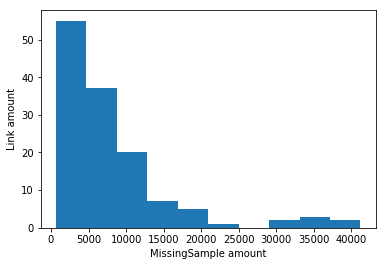

In [235]:
from matplotlib import pyplot as plt

linkMissing = {}
for linkID in travelHash:
    count = 0
    for timeID in travelHash[linkID]:
        for i in range(31, 122):
            if str(i) not in travelHash[linkID][timeID]:
                count = count + 1
    linkMissing[linkID] = count

linkList = []
valueList = []
for i in sorted(linkMissing.items(),  key=lambda d: d[1]):
    linkList.append(i[0])
    valueList.append(i[1])

plt.hist(valueList)
plt.xlabel("MissingSample amount")
plt.ylabel("Link amount")
plt.show()

                    

So we picked the link which has missing sample as little as possible to analyse, and we can also take some links that have 5000 missing sample to let the analysing more robust.
![jkjl](http://a1.qpic.cn/psb?/V148dNCw3iaZRT/pjCDovlltinTH3gZ.m4LF3ozAv6lp6LBQoOFE.*Ce40!/b/dPMAAAAAAAAA&bo=iwGUAIsBlAARADc!&rf=viewer_4)
And for which links have too much missing samples, maybe it will be hard to use model to pridict, then we can use some summary statistic to fit that.

In [236]:
link1 = '4377906286843600514'
link2 = '4377906285343600514'


### 2.2 Travel time in successive dates.
In data set, we want to know the change rule from every date, then we can find which day is strange(travel time too long or too short) and we can know the trend, we can find there may be something interesting regularity in our data.

#### 2.21 Average travel time in successive dates.

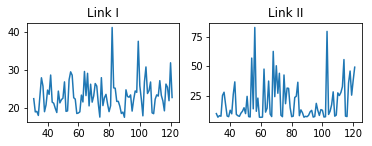

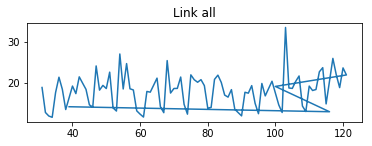

In [237]:
tempHash = {}
count = 0
for timeID in travelHash[link1]:
    if 480 <= int(timeID) and int(timeID) < 540:
        count = count + 1
        for dateID in travelHash[link1][timeID]:
            if int(dateID) <= 121:
                if dateID not in tempHash:
                    tempHash[dateID] = 0
                tempHash[dateID] = tempHash[dateID] + travelHash[link1][timeID][dateID][0]
tempHash2 = {}
count2 = 0
for timeID in travelHash[link2]:
    if 480 <= int(timeID) and int(timeID) < 540:
        count2 = count2 + 1
        for dateID in travelHash[link2][timeID]:
            if int(dateID) <= 121:
                if dateID not in tempHash2:
                    tempHash2[dateID] = 0
                tempHash2[dateID] = tempHash2[dateID] + travelHash[link2][timeID][dateID][0]
tempHash3 = {}
count3 = 0
for linkID in travelHash:
    for timeID in travelHash[linkID]:
        if 480 <= int(timeID) and int(timeID) < 540:
            count3 = count3 + 1
            for dateID in travelHash[linkID][timeID]:
                if int(dateID) <= 121:
                    if dateID not in tempHash3:
                        tempHash3[dateID] = 0
                    tempHash3[dateID] = tempHash3[dateID] + travelHash[linkID][timeID][dateID][0]

xList = []
yList = []
x2List = []
y2List = []
x3List = []
y3List = []
for dateID in tempHash:
    xList.append(dateID)
    yList.append(tempHash[dateID] / count)
for dateID in tempHash2:
    x2List.append(dateID)
    y2List.append(tempHash2[dateID] / count2)
for dateID in tempHash3:
    x3List.append(dateID)
    y3List.append(tempHash3[dateID] / count3)

plt.figure(1)
plt.subplot(2,2,1)
plt.plot(xList, yList)
plt.title('Link I')

plt.subplot(2,2,2)
plt.plot(x2List, y2List)
plt.title('Link II')

plt.figure(2)
plt.subplot(2,1,2)
plt.plot(x3List, y3List)
plt.title('Link all')
plt.show()

xList = []
yList = []
x2List = []
y2List = []
x3List = []
y3List = []
tempHash = {}
tempHash2 = {} 
tempHash3 = {}

So look at the table, we can know data at the begin is not stable, and actually we do not need very previous data, it is not useful to time series. And we know the data in holidays is unusual, so we also do not use the data in holidays.   
From the table we can know that also travel time in someday is abnormal but most data is ragular, they all reached a stable level between about 5 and 25.  
Another discovery is the traffic will be better in holiday and weekend, i guess maybe now people don't want to go out to have fun anymore.

#### 2.22 Average travel time in successive interval.
For comparision we pick the same link to draw table.

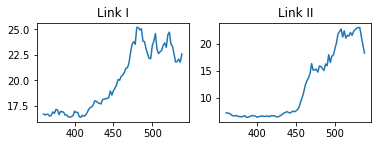

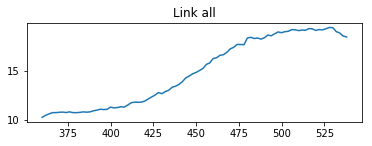

In [238]:
for timeID in travelHash[link1]:
    if 360 <= int(timeID) and int(timeID) < 540:
        sum = 0
        count = 0
        for dateID in travelHash[link1][timeID]:
            sum = sum + travelHash[link1][timeID][dateID][0]
            count = count + 1
        sum = sum / count
        xList.append(timeID)
        yList.append(sum)

for timeID in travelHash[link2]:
    if 360 <= int(timeID) and int(timeID) < 540:
        sum = 0
        count = 0
        for dateID in travelHash[link2][timeID]:
            sum = sum + travelHash[link2][timeID][dateID][0]
            count = count + 1
        sum = sum / count
        x2List.append(timeID)
        y2List.append(sum)
    
linkCounter = 0 
for linkID in travelHash:
    linkCounter = linkCounter + 1
    for timeID in travelHash[linkID]:
        if 360 <= int(timeID) and int(timeID) < 540:
            if timeID not in tempHash:
                tempHash[timeID] = 0
            sum = 0
            count = 0
            for dateID in travelHash[linkID][timeID]:
                sum = sum + travelHash[linkID][timeID][dateID][0]
                count = count + 1
            sum = sum / count
            tempHash[timeID]  = tempHash[timeID] + sum
        
for timeID in tempHash:
    x3List.append(timeID)
    y3List.append(tempHash[timeID] / linkCounter)

plt.figure(1)
plt.subplot(2,2,1)
plt.plot(xList, yList)
plt.title('Link I')

plt.subplot(2,2,2)
plt.plot(x2List, y2List)
plt.title('Link II')

plt.figure(2)
plt.subplot(2,1,2)
plt.plot(x3List, y3List)
plt.title('Link all')
plt.show()


xList = []
yList = []
x2List = []
y2List = []
x3List = []
y3List = []
tempHash = {}
    
            

From the table we can know there is a tendency, travel time in 480-540 is obviously longer than 360-480, and in linkII we can see the big change between 450-480, maybe we can use the difference as a feature or we can test the dependency of them.

#### 2.23 Average travel time in day of the week.

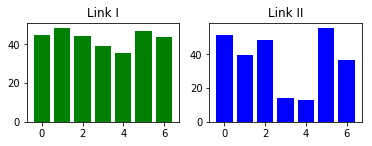

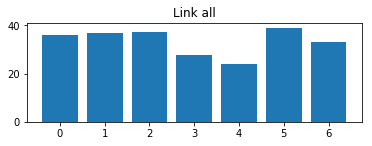

In [239]:
tempHash = {}
count = 0
for timeID in travelHash[link1]:
    if 480 <= int(timeID) and int(timeID) < 540:
        count = count + 1
        for dateID in travelHash[link1][timeID]:
            if int(dateID) <= 121:
                dateIDw = int(dateID) % 7
                if dateIDw not in tempHash:
                    tempHash[dateIDw] = 0
                tempHash[dateIDw] = tempHash[dateIDw] + travelHash[link1][timeID][dateID][0]
tempHash2 = {}
count2 = 0
for timeID in travelHash[link2]:
    if 480 <= int(timeID) and int(timeID) < 540:
        count2 = count2 + 1
        for dateID in travelHash[link2][timeID]:
            if int(dateID) <= 121:
                dateIDw = int(dateID) % 7
                if dateIDw not in tempHash2:
                    tempHash2[dateIDw] = 0
                tempHash2[dateIDw] = tempHash2[dateIDw] + travelHash[link2][timeID][dateID][0]
tempHash3 = {}
count3 = 0
for linkID in travelHash:
    for timeID in travelHash[linkID]:
        if 480 <= int(timeID) and int(timeID) < 540:
            count3 = count3 + 1
            for dateID in travelHash[linkID][timeID]:
                if int(dateID) <= 121:
                    dateIDw= int(dateID) % 7
                    if dateIDw not in tempHash3:
                        tempHash3[dateIDw] = 0
                    tempHash3[dateIDw] = tempHash3[dateIDw] + travelHash[linkID][timeID][dateID][0]

xList = []
yList = []
x2List = []
y2List = []
x3List = []
y3List = []
for dateID in tempHash:
    xList.append(dateID)
    yList.append(tempHash[dateID] / count / 7)
for dateID in tempHash2:
    x2List.append(dateID)
    y2List.append(tempHash2[dateID] / count2 / 7)
for dateID in tempHash3:
    x3List.append(dateID)
    y3List.append(tempHash3[dateID] / count3 / 7)

plt.figure(1)
plt.subplot(2,2,1)
plt.bar(xList,yList, color = 'g')
plt.title('Link I')

plt.subplot(2,2,2)
plt.bar(x2List,y2List, color = 'b')
plt.title('Link II')

plt.figure(2)
plt.subplot(2,1,2)
plt.bar(x3List,y3List)
plt.title('Link all')
plt.show()

xList = []
yList = []
x2List = []
y2List = []
x3List = []
y3List = []
tempHash = {}
tempHash2 = {}
tempHash3 = {}

From the table, we know data in a week does not has a big change in all link, but there does exist some difference in linkII. It may makes some difference but not a big work.

### 2.3 Top Relation Analysing
The travel time in each link is not isolated, if the travel time in one link is long then the most links' travel time are usually long, it may be a strong relation between two links existed. 

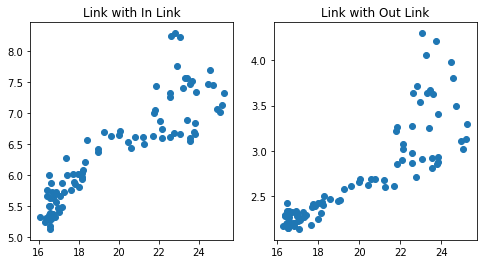

In [240]:
import numpy as np
inLink1 = topHash['4377906282815800514']['IN']
outLink1 = topHash['4377906282815800514']['OUT']
xList = []
yList = []
for timeID in travelHash[link1]:
    if timeID in travelHash[inLink1] and 360 <= int(timeID) and int(timeID) < 540:
        dateListx = []
        dateListy = []
        for dateID in travelHash[link1][timeID]:
            if dateID in travelHash[inLink1][timeID]:
                dateListx.append(travelHash[link1][timeID][dateID])
                dateListy.append(travelHash[inLink1][timeID][dateID])
        xList.append(np.average(dateListx))
        yList.append(np.average(dateListy))
x2List = []
y2List = []
for timeID in travelHash[link1]:
    if timeID in travelHash[outLink1] and 360 <= int(timeID) and int(timeID) < 540:
        dateListx = []
        dateListy = []
        for dateID in travelHash[link1][timeID]:
            if dateID in travelHash[outLink1][timeID]:
                dateListx.append(travelHash[link1][timeID][dateID])
                dateListy.append(travelHash[outLink1][timeID][dateID])
        x2List.append(np.average(dateListx))
        y2List.append(np.average(dateListy))
fig = plt.figure(figsize=(8,4))
plt.subplot(121)
plt.scatter(xList, yList)
plt.title("Link with In Link")

plt.subplot(122)
plt.scatter(x2List, y2List)
plt.title("Link with Out Link")
plt.show()

xList = []
yList = []
x2List = []
y2List = []

From the table we can know that the before link and the behind link both have some relation with the current link, but that is not so strong, so we have to find some method to use it.

## 3 Data Preprocessing
The data is a time series struct, it has two dimensions, one is date axis and other one is time interval axis, the date dimension can provide us history information and time interval dimension can provide us tempory information  
![erwei](http://a2.qpic.cn/psb?/V148dNCw3iaZRT/LOhWC10INzFG*N.nLhnaU.JmmzuPhlk.02qjCGjfrhI!/b/dD8BAAAAAAAA&bo=gASIAoAEiAIRCT4!&rf=viewer_4)

So when we want to do data pre-processing, we have to do it twice in different dimension.

### 3.1 3δ Criterion
3δcriterion also named pauta criterion is a criterion can let you pick out abnormal data which beyonds （Ω-3*δ, Ω+3*δ）, and it will be very important when you need to use like max or min feature, at least you can void to get a very bad value.






In [241]:
import numpy as np

for linkID in travelHash:
    for timeID in travelHash[linkID]:
        valueList = []
        for dateID in travelHash[linkID][timeID]:
            valueList.append(travelHash[linkID][timeID][dateID][0])
        average = np.average(valueList)
        std = np.std(valueList)
        for dateID in travelHash[linkID][timeID]:
            if(travelHash[linkID][timeID][dateID][0] > average - 3 * std \
               and travelHash[linkID][timeID][dateID][0] <= average + 3 * std):
                travelHash[linkID][timeID][dateID][1] = average
                

I don't think delete abnormal data is a good way to fix data becasue it will break time series, when you traverse the ordered dict actually you will miss some date or some time interval but you even don't know, so i prefer to fix will average data.  
It can just fix a litter data, so it may be hard to discern the change but it is very helpful for your data health.

### 3.2 Sliding Window
Sliding window method can make your data more smoothness but less accuracy, it use a window to traverse the data by time series, the window may contains there or five data, then use the average value in window to replace the middle data. It can stand the trend out and make your data double.

In [242]:
for linkID in travelHash:
    for timeID in travelHash[linkID]:
        for dateID in travelHash[linkID][timeID]:
            if str(int(dateID) - 1) not in travelHash[linkID][timeID] \
            or str(int(dateID) + 1) not in travelHash[linkID][timeID]:
                continue
            else:
                travelHash[linkID][timeID][dateID][1] = \
                ( travelHash[linkID][timeID][str(int(dateID) - 1)][0] + \
                  travelHash[linkID][timeID][dateID][0] + \
                  travelHash[linkID][timeID][str(int(dateID) + 1)][0] \
                ) / 3
            

Draw comparable table

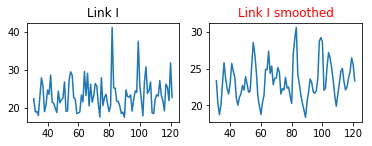

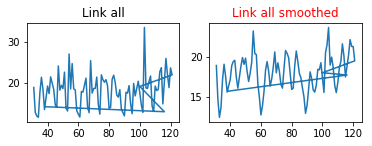

In [243]:
tempHash = {}
tempHash2 = {}
count = 0
for timeID in travelHash[link1]:
    if 480 <= int(timeID) and int(timeID) < 540:
        count = count + 1
        for dateID in travelHash[link1][timeID]:
            if int(dateID) <= 121:
                if dateID not in tempHash:
                    tempHash[dateID] = 0
                tempHash[dateID] = tempHash[dateID] + travelHash[link1][timeID][dateID][0]
                if dateID not in tempHash2:
                    tempHash2[dateID] = 0
                tempHash2[dateID] = tempHash2[dateID] + travelHash[link1][timeID][dateID][1]

tempHash3 = {}
tempHash4 = {}
count3 = 0
for linkID in travelHash:
    for timeID in travelHash[linkID]:
        if 480 <= int(timeID) and int(timeID) < 540:
            count3 = count3 + 1
            for dateID in travelHash[linkID][timeID]:
                if int(dateID) <= 121:
                    if dateID not in tempHash3:
                        tempHash3[dateID] = 0
                    tempHash3[dateID] = tempHash3[dateID] + travelHash[linkID][timeID][dateID][0]
                    if dateID not in tempHash4:
                        tempHash4[dateID] = 0
                    tempHash4[dateID] = tempHash4[dateID] + travelHash[linkID][timeID][dateID][1]
xList = []
yList = []
x2List = []
y2List = []
x3List = []
y3List = []
x4List = []
y4List = []
for dateID in tempHash:
    xList.append(dateID)
    yList.append(tempHash[dateID] / count)
for dateID in tempHash2:
    x2List.append(dateID)
    y2List.append(tempHash2[dateID] / count)
for dateID in tempHash3:
    x3List.append(dateID)
    y3List.append(tempHash3[dateID] / count3)
for dateID in tempHash4:
    x4List.append(dateID)
    y4List.append(tempHash4[dateID] / count3)

plt.figure(1)
plt.subplot(2,2,1)
plt.plot(xList, yList)
plt.title('Link I')

plt.subplot(2,2,2)
plt.plot(x2List, y2List)
plt.title('Link I smoothed', color = 'r')

plt.figure(2)
plt.subplot(2,2,1)
plt.plot(x3List, y3List)
plt.title('Link all')

plt.subplot(2,2,2)
plt.plot(x4List, y4List)
plt.title('Link all smoothed', color = 'r')
plt.show()

xList = []
yList = []
x2List = []
y2List = []
x3List = []
y3List = []
x4List = []
y4List = []
tempHash = {}
tempHash2 = {}
tempHash3 = {}
tempHash4 = {}

From the table it is obvious that data smoothed by sliding window becomes more smooth, the frequency of the wave is lower and the value becomes more intensive.   
And in the same way we can do that on anthoer dimension, but because the time interval is just 2 minutes, it it better to let the window contains more data.

In [244]:
for linkID in travelHash:
    for timeID in travelHash[linkID]:
        if str(int(timeID) - 2) not in travelHash[linkID] \
        or str(int(timeID) + 2) not in travelHash[linkID] \
        or str(int(timeID) - 4) not in travelHash[linkID] \
        or str(int(timeID) + 4) not in travelHash[linkID]:
            continue
        else:
            for dateID in travelHash[linkID][timeID]:
                if dateID not in travelHash[linkID][str(int(timeID) - 2)] \
                or dateID not in travelHash[linkID][str(int(timeID) + 2)] \
                or dateID not in travelHash[linkID][str(int(timeID) - 4)] \
                or dateID not in travelHash[linkID][str(int(timeID) + 4)]:
                    continue
                else:
                    travelHash[linkID][timeID][dateID][1] = \
                    ( travelHash[linkID][str(int(timeID) - 2)][dateID][1] + \
                    travelHash[linkID][str(int(timeID) + 2)][dateID][1] + \
                    travelHash[linkID][timeID][dateID][1] + \
                    travelHash[linkID][str(int(timeID) - 4)][dateID][1] + \
                    travelHash[linkID][str(int(timeID) + 4)][dateID][1] ) / 5
                
            

Draw comparable table

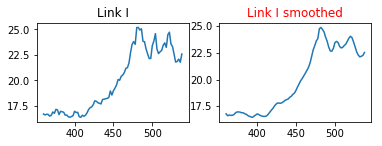

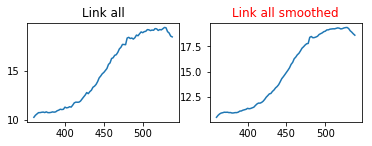

In [245]:
for timeID in travelHash[link1]:
    if 360 <= int(timeID) and int(timeID) < 540:
        sum = 0
        count = 0
        for dateID in travelHash[link1][timeID]:
            sum = sum + travelHash[link1][timeID][dateID][0]
            count = count + 1
        sum = sum / count
        xList.append(timeID)
        yList.append(sum)
        
for timeID in travelHash[link1]:
    if 360 <= int(timeID) and int(timeID) < 540:
        sum = 0
        count = 0
        for dateID in travelHash[link1][timeID]:
            sum = sum + travelHash[link1][timeID][dateID][1]
            count = count + 1
        sum = sum / count
        x2List.append(timeID)
        y2List.append(sum)

linkCounter = 0 
for linkID in travelHash:
    linkCounter = linkCounter + 1
    for timeID in travelHash[linkID]:
        if 360 <= int(timeID) and int(timeID) < 540:
            if timeID not in tempHash:
                tempHash[timeID] = 0
            if timeID not in tempHash2:
                tempHash2[timeID] = 0
            sum = 0
            sum2 = 0
            count = 0
            for dateID in travelHash[linkID][timeID]:
                sum = sum + travelHash[linkID][timeID][dateID][0]
                sum2 = sum2 + travelHash[linkID][timeID][dateID][1]
                count = count + 1
            sum = sum / count
            sum2 = sum2 / count
            tempHash[timeID]  = tempHash[timeID] + sum
            tempHash2[timeID] = tempHash2[timeID] + sum2
        
for timeID in tempHash:
    x3List.append(timeID)
    y3List.append(tempHash[timeID] / linkCounter)
for timeID in tempHash2:
    x4List.append(timeID)
    y4List.append(tempHash2[timeID] / linkCounter)
    
plt.figure(1)
plt.subplot(2,2,1)
plt.plot(xList, yList)
plt.title('Link I')

plt.subplot(2,2,2)
plt.plot(x2List, y2List)
plt.title('Link I smoothed', color = 'r')

plt.figure(2)
plt.subplot(2,2,1)
plt.plot(x3List, y3List)
plt.title('Link all')

plt.subplot(2,2,2)
plt.plot(x4List, y4List)
plt.title('Link all smoothed', color = 'r')
plt.show()

xList = []
yList = []
x2List = []
y2List = []
x3List = []
y3List = []
x4List = []
y4List = []
tempHash = {}
tempHash2 = {}

## 4. Feature Engineering

After we do data preprocessing and data analysing, there are so many features we can use. So we have counted some feature from tempory dimension, history dimension and week dimension.     
Each feature i use a dict to save then when i need to use it i just use the key to take it.

### 4.1 History dimension
In history dimension we have taken these features:    
>1.The median value in same interval of history time.     
2.The average value in same interval of history time.    
3.The max value in same interval of history time.   
4.The min value in same interval of history time.   
5.The standard deviation in same interval of history time.   
6.The rank of the interval's median/average value in all intervals.   
7.The rank/maxRank of the interval's median/average value in all intervals.  
8.The difference from this median/average value to all median value's average value.    
9.Smooth edition of above features.

Get feature median/max/min/average/std value

In [246]:
medianHistoryHash = {}
medianHistoryHashS = {}
maxHistoryHash = {}
maxHistoryHashS = {}
minHistoryHash = {}
minHistoryHashS = {}
averageHistoryHash = {}
averageHistoryHashS = {}
stdHistoryHash = {}
stdHistoryHashS = {}
for linkID in travelHash:
    for timeID in travelHash[linkID]:
        if 480 <= int(timeID) and int(timeID) < 540:
            valueList = []
            valueListS = []
            for dateID in travelHash[linkID][timeID]:
                if 0 < int(dateID) and int(dateID) <= 92:
                    valueList.append(travelHash[linkID][timeID][dateID][0])
                    valueListS.append(travelHash[linkID][timeID][dateID][1])
                if len(valueList) != 0:
                    key = linkID + '-' + timeID
                    medianHistoryHash[key] = np.median(valueList)
                    medianHistoryHashS[key] = np.median(valueListS)
                    maxHistoryHash[key] = np.max(valueList)
                    maxHistoryHashS[key] = np.max(valueListS)
                    minHistoryHash[key] = np.min(valueList)
                    minHistoryHashS[key] = np.min(valueListS)
                    averageHistoryHash[key] = np.average(valueList)
                    averageHistoryHashS[key] = np.average(valueListS)
                    stdHistoryHash[key] = np.std(valueList)
                    stdHistoryHashS[key] = np.std(valueListS)
                    
                    

Get history Rank feature  
These features must use the base features, so it called the advanced feature.

In [247]:
rankHistoryHash = {}
rankHistoryHashS = {}
percentHistoryHash = {}
percentHistoryHashS = {}

rankTemp = {}
rankTempS = {}
for key in medianHistoryHash:
    keyList = key.split('-')
    linkID = keyList[0]
    timeID = keyList[1]
    if linkID not in rankTemp:
        rankTemp[linkID] = collections.OrderedDict()
        rankTempS[linkID] = collections.OrderedDict()
    rankTemp[linkID][timeID] = medianHistoryHash[key]
    rankTempS[linkID][timeID] = medianHistoryHashS[key]

for linkID in rankTemp:
    rankTemp[linkID] = sorted(rankTemp[linkID].items(), key=lambda d:d[1])
for linkID in rankTempS:
    rankTempS[linkID] = sorted(rankTempS[linkID].items(), key=lambda d:d[1])
    
for linkID in rankTemp:
    count = 0
    size = len(rankTemp[linkID])
    for timeID in rankTemp[linkID]:
        key = linkID + '-' + timeID[0]
        rankHistoryHash[key] = count
        percentHistoryHash[key] = count / size
        count = count + 1
for linkID in rankTempS:
    count = 0
    size = len(rankTempS[linkID])
    for timeID in rankTempS[linkID]:
        key = linkID + '-' + timeID[0]
        rankHistoryHashS[key] = count
        percentHistoryHashS[key] = count / size
        count = count + 1
    

Get history difference between links feature:    
(This feature can not show the rules in history line, but can show the history feature's difference between each links, so it can point the difference of each links, give us the unique information of these links)

In [248]:
averageHistoryDiffHash = {}
averageHistoryDiffHashS = {}
medianHistoryDiffHash = {}
medianHistoryDiffHashS = {}

for key in medianHistoryHash:
    keyList = key.split('-')
    timeID = keyList[1]
    if timeID not in averageHistoryDiffHash:
        averageHistoryDiffHash[timeID] = []
    if timeID not in medianHistoryDiffHash:
        medianHistoryDiffHash[timeID] = []
    averageHistoryDiffHash[timeID].append(medianHistoryHash[key])
    medianHistoryDiffHash[timeID].append(medianHistoryHash[key])
for timeID in averageHistoryDiffHash:
    averageHistoryDiffHash[timeID] = np.average(averageHistoryDiffHash[timeID])
for timeID in medianHistoryDiffHash:
    medianHistoryDiffHash[timeID] = np.median(medianHistoryDiffHash[timeID])

for key in medianHistoryHashS:
    keyList = key.split('-')
    timeID = keyList[1]
    if timeID not in averageHistoryDiffHashS:
        averageHistoryDiffHashS[timeID] = []
    if timeID not in medianHistoryDiffHashS:
        medianHistoryDiffHashS[timeID] = []
    averageHistoryDiffHashS[timeID].append(medianHistoryHashS[key])
    medianHistoryDiffHashS[timeID].append(medianHistoryHashS[key])
for timeID in averageHistoryDiffHashS:
    averageHistoryDiffHashS[timeID] = np.average(averageHistoryDiffHashS[timeID])
for timeID in medianHistoryDiffHashS:
    medianHistoryDiffHashS[timeID] = np.median(medianHistoryDiffHashS[timeID])



### 4.2 Temporary Dimension
In these dimention, we can dig some feature temproy feature out, these features can reflect the change of each day.    
>1.The median value in same date of current day.     
2.The average value in same date of current day.   
3.The max value in same date of current day.   
4.The min value in same date of current day.   
5.The standard deviation in same date of current day.    
6.The rank of the interval's median/average value in all intervals.    
7.The rank/maxRank of the interval's median/average value in all intervals.   
8.The difference from this median/average value to all median value's average value.   
9.The median value in same date of current day in timeID 420-480.    
10.The last time intervel before prediction time.    
9.Smooth edition of above features.    

In [249]:
medianTemporaryHash = {}
medianTemporaryHashS = {}
maxTemporaryHash = {}
maxTemporaryHashS = {}
minTemporaryHash = {}
minTemporaryHashS = {}
averageTemporaryHash = {}
averageTemporaryHashS = {}
stdTemporaryHash = {}
stdTemporaryHashS ={}

for linkID in travelHash:
    dateHash = {}
    dateHashS = {}
    for timeID in travelHash[linkID]:
        if 360 <= int(timeID) and int(timeID) < 480:
            for dateID in travelHash[linkID][timeID]:
                if dateID not in dateHash:
                    dateHash[dateID] = []
                    dateHashS[dateID] = []
                dateHash[dateID].append(travelHash[linkID][timeID][dateID][0])
                dateHashS[dateID].append(travelHash[linkID][timeID][dateID][1])
    for dateID in dateHash:
        key = linkID + '-' + dateID
        medianTemporaryHash[key] = np.median(dateHash[dateID])
        maxTemporaryHash[key] = np.max(dateHash[dateID])
        minTemporaryHash[key] = np.min(dateHash[dateID])
        averageTemporaryHash[key] = np.average(dateHash[dateID])
        stdTemporaryHash[key] = np.std(dateHash[dateID])
    for dateID in dateHashS:
        key = linkID + '-' + dateID
        medianTemporaryHashS[key] = np.median(dateHashS[dateID])
        maxTemporaryHashS[key] = np.max(dateHashS[dateID])
        minTemporaryHashS[key] = np.min(dateHashS[dateID])
        averageTemporaryHashS[key] = np.average(dateHashS[dateID])
        stdTemporaryHashS[key] = np.std(dateHashS[dateID])
        

Get the rank and percent feature:    
(My code may be some tedious here)

In [250]:
medRankTemporaryHash = {}
maxRankTemporaryHash = {}
minRankTemporaryHash = {}
avgRankTemporaryHash = {}
stdRankTemporaryHash = {}

medRankTemporaryHashS = {}
maxRankTemporaryHashS = {}
minRankTemporaryHashS = {}
avgRankTemporaryHashS = {}
stdRankTemporaryHashS = {}

medPercentTemporaryHash = {}
maxPercentTemporaryHash = {}
minPercentTemporaryHash = {}
avgPercentTemporaryHash = {}
stdPercentTemporaryHash = {}

medPercentTemporaryHashS = {}
maxPercentTemporaryHashS = {}
minPercentTemporaryHashS = {}
avgPercentTemporaryHashS = {}
stdPercentTemporaryHashS = {}

tempHashMed = {}
tempHashMax = {}
tempHashMin = {}
tempHashAvg = {}
tempHashStd = {}

tempHashMedS = {}
tempHashMaxS = {}
tempHashMinS = {}
tempHashAvgS = {}
tempHashStdS = {}
for key in medianTemporaryHash:
    keyList = key.split('-')
    linkID = keyList[0]
    dateID = keyList[1]
    if linkID not in tempHashMed:
        tempHashMed[linkID] = collections.OrderedDict()
    if linkID not in tempHashMax:
        tempHashMax[linkID] = collections.OrderedDict()
    if linkID not in tempHashMin:
        tempHashMin[linkID] = collections.OrderedDict()
    if linkID not in tempHashAvg:
        tempHashAvg[linkID] = collections.OrderedDict()
    if linkID not in tempHashStd:
        tempHashStd[linkID] = collections.OrderedDict()
        
    if linkID not in tempHashMedS:
        tempHashMedS[linkID] = collections.OrderedDict()
    if linkID not in tempHashMaxS:
        tempHashMaxS[linkID] = collections.OrderedDict()
    if linkID not in tempHashMinS:
        tempHashMinS[linkID] = collections.OrderedDict()
    if linkID not in tempHashAvgS:
        tempHashAvgS[linkID] = collections.OrderedDict()
    if linkID not in tempHashStdS:
        tempHashStdS[linkID] = collections.OrderedDict()
    
    tempHashMed[linkID][dateID] = medianTemporaryHash[key]
    tempHashMax[linkID][dateID] = maxTemporaryHash[key]
    tempHashMin[linkID][dateID] = minTemporaryHash[key]
    tempHashAvg[linkID][dateID] = averageTemporaryHash[key]
    tempHashStd[linkID][dateID] = stdTemporaryHash[key]
    tempHashMedS[linkID][dateID] = medianTemporaryHashS[key]
    tempHashMaxS[linkID][dateID] = maxTemporaryHashS[key]
    tempHashMinS[linkID][dateID] = minTemporaryHashS[key]
    tempHashAvgS[linkID][dateID] = averageTemporaryHashS[key]
    tempHashStdS[linkID][dateID] = stdTemporaryHashS[key]

for linkID in tempHashMed:
    tempHashMed[linkID] = sorted(tempHashMed[linkID].items(), key=lambda d: d[1])
for linkID in tempHashMax.keys():
    tempHashMax[linkID] = sorted(tempHashMax[linkID].items(), key=lambda d: d[1])
for linkID in tempHashMin.keys():
    tempHashMin[linkID] = sorted(tempHashMin[linkID].items(), key=lambda d: d[1])
for linkID in tempHashAvg.keys():
    tempHashAvg[linkID] = sorted(tempHashAvg[linkID].items(), key=lambda d: d[1])
for linkID in tempHashStd.keys():
    tempHashStd[linkID] = sorted(tempHashStd[linkID].items(), key=lambda d: d[1])
for linkID in tempHashMedS.keys():
    tempHashMedS[linkID] = sorted(tempHashMedS[linkID].items(), key=lambda d: d[1])
for linkID in tempHashMaxS.keys():
    tempHashMaxS[linkID] = sorted(tempHashMaxS[linkID].items(), key=lambda d: d[1])
for linkID in tempHashMinS.keys():
    tempHashMinS[linkID] = sorted(tempHashMinS[linkID].items(), key=lambda d: d[1])
for linkID in tempHashAvgS.keys():
    tempHashAvgS[linkID] = sorted(tempHashAvgS[linkID].items(), key=lambda d: d[1])
for linkID in tempHashStdS.keys():
    tempHashStdS[linkID] = sorted(tempHashStdS[linkID].items(), key=lambda d: d[1])

for linkID in tempHashMed:
    count = 0
    size = len(tempHashMed[linkID])
    for dateID in tempHashMed[linkID]:
        key = linkID + '-' + dateID[0]
        medRankTemporaryHash[key] = count
        medPercentTemporaryHash[key] = count / size
        count = count + 1

for linkID in tempHashMax:
    count = 0
    size = len(tempHashMax[linkID])
    for dateID in tempHashMax[linkID]:
        key = linkID + '-' + dateID[0]
        maxRankTemporaryHash[key] = count
        maxPercentTemporaryHash[key] = count / size
        count = count + 1

for linkID in tempHashMin:
    count = 0
    size = len(tempHashMin[linkID])
    for dateID in tempHashMin[linkID]:
        key = linkID + '-' + dateID[0]
        minRankTemporaryHash[key] = count
        minPercentTemporaryHash[key] = count / size
        count = count + 1

for linkID in tempHashAvg:
    count = 0
    size = len(tempHashAvg[linkID])
    for dateID in tempHashAvg[linkID]:
        key = linkID + '-' + dateID[0]
        avgRankTemporaryHash[key] = count
        avgPercentTemporaryHash[key] = count / size
        count = count + 1

for linkID in tempHashStd:
    count = 0
    size = len(tempHashStd[linkID])
    for dateID in tempHashStd[linkID]:
        key = linkID + '-' + dateID[0]
        stdRankTemporaryHash[key] = count
        stdPercentTemporaryHash[key] = count / size
        count = count + 1

for linkID in tempHashMedS:
    count = 0
    size = len(tempHashMedS[linkID])
    for dateID in tempHashMedS[linkID]:
        key = linkID + '-' + dateID[0]
        medRankTemporaryHashS[key] = count
        medPercentTemporaryHashS[key] = count / size
        count = count + 1

for linkID in tempHashMaxS:
    count = 0
    size = len(tempHashMaxS[linkID])
    for dateID in tempHashMaxS[linkID]:
        key = linkID + '-' + dateID[0]
        maxRankTemporaryHashS[key] = count
        maxPercentTemporaryHashS[key] = count / size
        count = count + 1

for linkID in tempHashMinS:
    count = 0
    size = len(tempHashMinS[linkID])
    for dateID in tempHashMinS[linkID]:
        key = linkID + '-' + dateID[0]
        minRankTemporaryHashS[key] = count
        minPercentTemporaryHashS[key] = count / size
        count = count + 1

for linkID in tempHashAvgS:
    count = 0
    size = len(tempHashAvgS[linkID])
    for dateID in tempHashAvgS[linkID]:
        key = linkID + '-' + dateID[0]
        avgRankTemporaryHashS[key] = count
        avgPercentTemporaryHashS[key] = count / size
        count = count + 1

for linkID in tempHashStdS:
    count = 0
    size = len(tempHashStdS[linkID])
    for dateID in tempHashStdS[linkID]:
        key = linkID + '-' + dateID[0]
        stdRankTemporaryHashS[key] = count
        stdPercentTemporaryHashS[key] = count / size
        count = count + 1


Get the diff feature

In [251]:
diffAvgTemporaryHash = {}
diffMedTemporaryHash = {}
for key in medianTemporaryHash:
    keyList = key.split("-")
    dateID = keyList[1]
    if dateID not in diffAvgTemporaryHash:
        diffAvgTemporaryHash[dateID] = []
    if dateID not in diffMedTemporaryHash:
        diffMedTemporaryHash[dateID] = []
    diffAvgTemporaryHash[dateID].append(medianTemporaryHash[key])
    diffMedTemporaryHash[dateID].append(medianTemporaryHash[key])
    
for dateID in diffAvgTemporaryHash:
    diffAvgTemporaryHash[dateID] = np.average(diffAvgTemporaryHash[dateID])
for dateID in diffMedTemporaryHash:
    diffMedTemporaryHash[dateID] = np.median(diffMedTemporaryHash[dateID])
    

### 4.3 Week Demision
In this deminsion we just get two features, but i think it can provide us more features, so i will put some new feature we did not use before.
> 1.Median value in each day of week.    
2.Smooth value.

In [252]:
weekHash = {}
for linkID in travelHash:
    for timeID in travelHash[linkID]:
        if 480 <= int(timeID) and int(timeID) < 540:
            tempHash = {}
            for dateID in travelHash[linkID][timeID]:
                if 0 <= int(dateID) and int(dateID) < 92:
                    week = str(int(dateID) % 7)
                    if week not in tempHash:
                        tempHash[week] = []
                    tempHash[week].append(travelHash[linkID][timeID][dateID][0])
            for week in tempHash:
                value = np.median(tempHash[week])
                key = linkID + '-' + week
                weekHash[key] = value
                        
            
weekHashS = {}
for linkID in travelHash:
    for timeID in travelHash[linkID]:
        if 480 <= int(timeID) and int(timeID) < 540:
            tempHashS = {}
            for dateID in travelHash[linkID][timeID]:
                if 0 <= int(dateID) and int(dateID) < 92:
                    week = str(int(dateID) % 7)
                    if week not in tempHashS:
                        tempHashS[week] = []
                    tempHashS[week].append(travelHash[linkID][timeID][dateID][1])
            for week in tempHashS:
                value = np.median(tempHashS[week])
                key = linkID + '-' + week
                weekHashS[key] = value

Get the feature and label data fream:  

In [253]:
trainVector = []
labelVector = []

for linkID in travelHash:
    for timeID in travelHash[linkID]:
        if 480 <= int(timeID) and int(timeID) < 540:
            for dateID in travelHash[linkID][timeID]:
                linkAndTimeKey = linkID + "-" + timeID
                linkAndDateKey = linkID + "-" + dateID
                linkAndWeekKey = linkID + "-" + str(int(dateID) % 7)
                if 63 <= int(dateID) and int(dateID) < 92:
                    if linkAndTimeKey not in medianHistoryHash:
                        continue    
                    if linkAndDateKey not in medianTemporaryHash:
                        continue
                    if linkAndWeekKey not in weekHash:
                        continue
                    
                    sample = []
                    #History feature:
                    sample.append(medianHistoryHash[linkAndTimeKey])
                    sample.append(medianHistoryHashS[linkAndTimeKey])
                    sample.append(maxHistoryHash[linkAndTimeKey])
                    sample.append(maxHistoryHashS[linkAndTimeKey])
                    sample.append(minHistoryHash[linkAndTimeKey])
                    sample.append(minHistoryHashS[linkAndTimeKey])
                    sample.append(averageHistoryHash[linkAndTimeKey])
                    sample.append(averageHistoryHashS[linkAndTimeKey])
                    sample.append(stdHistoryHash[linkAndTimeKey])
                    sample.append(stdHistoryHashS[linkAndTimeKey])
                    sample.append(rankHistoryHash[linkAndTimeKey])
                    sample.append(rankHistoryHashS[linkAndTimeKey])
                    sample.append(percentHistoryHash[linkAndTimeKey])
                    sample.append(percentHistoryHashS[linkAndTimeKey])
                    sample.append(medianHistoryHash[linkAndTimeKey] - averageHistoryDiffHash[timeID])
                    sample.append(medianHistoryHashS[linkAndTimeKey] - averageHistoryDiffHashS[timeID])
                    sample.append(medianHistoryHash[linkAndTimeKey] - medianHistoryDiffHash[timeID])
                    sample.append(medianHistoryHashS[linkAndTimeKey] - medianHistoryDiffHashS[timeID])
                    #Temporary feature:
                    sample.append(medianTemporaryHash[linkAndDateKey])
                    sample.append(medianTemporaryHashS[linkAndDateKey])
                    sample.append(maxTemporaryHash[linkAndDateKey])
                    sample.append(maxTemporaryHashS[linkAndDateKey])
                    sample.append(minTemporaryHash[linkAndDateKey])
                    sample.append(minTemporaryHashS[linkAndDateKey])
                    sample.append(averageTemporaryHash[linkAndDateKey])
                    sample.append(averageTemporaryHashS[linkAndDateKey])
                    sample.append(stdTemporaryHash[linkAndDateKey])
                    sample.append(stdTemporaryHashS[linkAndDateKey])
                    sample.append(medRankTemporaryHash[linkAndDateKey])
                    sample.append(medRankTemporaryHashS[linkAndDateKey])
                    sample.append(maxRankTemporaryHash[linkAndDateKey])
                    sample.append(maxRankTemporaryHashS[linkAndDateKey])
                    sample.append(minRankTemporaryHash[linkAndDateKey])
                    sample.append(minRankTemporaryHashS[linkAndDateKey])
                    sample.append(avgRankTemporaryHash[linkAndDateKey])
                    sample.append(avgRankTemporaryHashS[linkAndDateKey])
                    sample.append(stdRankTemporaryHash[linkAndDateKey])
                    sample.append(stdRankTemporaryHashS[linkAndDateKey])
                    sample.append(medianTemporaryHash[linkAndDateKey] - diffAvgTemporaryHash[dateID])
                    sample.append(medianTemporaryHashS[linkAndDateKey] - diffAvgTemporaryHash[dateID])
                    sample.append(medianTemporaryHash[linkAndDateKey] - diffMedTemporaryHash[dateID])
                    sample.append(medianTemporaryHashS[linkAndDateKey] - diffMedTemporaryHash[dateID])
                    #Week feature:
                    sample.append(weekHash[linkAndWeekKey])
                    sample.append(weekHashS[linkAndWeekKey])
                    
                    trainVector.append(sample)
                    labelVector.append(travelHash[linkID][timeID][dateID][0])

Get the test datafream:

In [254]:
count = 0
testVector = []
realVector = []
linkGuide = []
timeGuide = []
dateGuide = []
for linkID in travelHash:
    for timeID in travelHash[linkID]:
        if 480 <= int(timeID) and int(timeID) < 540:
            for dateID in range(92, 122):
                linkAndTimeKey = linkID + "-" + timeID
                linkAndDateKey = linkID + "-" + str(dateID)
                linkAndWeekKey = linkID + "-" + str(dateID % 7)
                if str(dateID) not in travelHash[linkID][timeID]:
                    continue
                    
                sample = []
                
                #History feature:
                if linkAndTimeKey not in medianHistoryHash:
                    for i in range(0, 18):
                        sample.append(float("nan"))
                else:
                    sample.append(medianHistoryHash[linkAndTimeKey])
                    sample.append(medianHistoryHashS[linkAndTimeKey])
                    sample.append(maxHistoryHash[linkAndTimeKey])
                    sample.append(maxHistoryHashS[linkAndTimeKey])
                    sample.append(minHistoryHash[linkAndTimeKey])
                    sample.append(minHistoryHashS[linkAndTimeKey])
                    sample.append(averageHistoryHash[linkAndTimeKey])
                    sample.append(averageHistoryHashS[linkAndTimeKey])
                    sample.append(stdHistoryHash[linkAndTimeKey])
                    sample.append(stdHistoryHashS[linkAndTimeKey])
                    sample.append(rankHistoryHash[linkAndTimeKey])
                    sample.append(rankHistoryHashS[linkAndTimeKey])
                    sample.append(percentHistoryHash[linkAndTimeKey])
                    sample.append(percentHistoryHashS[linkAndTimeKey])
                    if timeID not in averageHistoryDiffHash:
                        for i in range(0, 4):
                            sample.append(float("nan"))
                    else:
                        sample.append(medianHistoryHash[linkAndTimeKey] - averageHistoryDiffHash[timeID])
                        sample.append(medianHistoryHashS[linkAndTimeKey] - averageHistoryDiffHashS[timeID])
                        sample.append(medianHistoryHash[linkAndTimeKey] - medianHistoryDiffHash[timeID])
                        sample.append(medianHistoryHashS[linkAndTimeKey] - medianHistoryDiffHashS[timeID])
                #Temporary feature:
                if linkAndDateKey not in medianTemporaryHash:
                    for i in range(0 , 24):
                        sample.append(float("nan"))
                else:
                    count = count + 1
                    sample.append(medianTemporaryHash[linkAndDateKey])
                    sample.append(medianTemporaryHashS[linkAndDateKey])
                    sample.append(maxTemporaryHash[linkAndDateKey])
                    sample.append(maxTemporaryHashS[linkAndDateKey])
                    sample.append(minTemporaryHash[linkAndDateKey])
                    sample.append(minTemporaryHashS[linkAndDateKey])
                    sample.append(averageTemporaryHash[linkAndDateKey])
                    sample.append(averageTemporaryHashS[linkAndDateKey])
                    sample.append(stdTemporaryHash[linkAndDateKey])
                    sample.append(stdTemporaryHashS[linkAndDateKey])
                    sample.append(medRankTemporaryHash[linkAndDateKey])
                    sample.append(medRankTemporaryHashS[linkAndDateKey])
                    sample.append(maxRankTemporaryHash[linkAndDateKey])
                    sample.append(maxRankTemporaryHashS[linkAndDateKey])
                    sample.append(minRankTemporaryHash[linkAndDateKey])
                    sample.append(minRankTemporaryHashS[linkAndDateKey])
                    sample.append(avgRankTemporaryHash[linkAndDateKey])
                    sample.append(avgRankTemporaryHashS[linkAndDateKey])
                    sample.append(stdRankTemporaryHash[linkAndDateKey])
                    sample.append(stdRankTemporaryHashS[linkAndDateKey])
                    if str(dateID) not in diffAvgTemporaryHash:
                        for i in range(0, 4):
                            sample.append(float("nan"))
                    else:
                        sample.append(medianTemporaryHash[linkAndDateKey] - diffAvgTemporaryHash[str(dateID)])
                        sample.append(medianTemporaryHashS[linkAndDateKey] - diffAvgTemporaryHash[str(dateID)])
                        sample.append(medianTemporaryHash[linkAndDateKey] - diffMedTemporaryHash[str(dateID)])
                        sample.append(medianTemporaryHashS[linkAndDateKey] - diffMedTemporaryHash[str(dateID)])
                #Week feature:
                if linkAndWeekKey not in weekHash:
                    sample.append(float("nan"))
                    sample.append(float("nan"))
                else:
                    sample.append(weekHash[linkAndWeekKey])
                    sample.append(weekHashS[linkAndWeekKey])
                testVector.append(sample)
                realVector.append(travelHash[linkID][timeID][str(dateID)][0])
                linkGuide.append(linkID)
                dateGuide.append(str(dateID))
                timeGuide.append(timeID)
print(count)

111003


In [255]:
train = np.array(trainVector)
label = np.array(labelVector)
T = np.column_stack((train,label))

test = np.array(testVector)
real = np.array(realVector)

### 4.4 Feature Dependency Analyze.
Test the denpendency of each feature, then compared which feature is more important and which feature is useless, it can help us find more good feature.    


In [256]:
import pandas as pd
pd.DataFrame(np.corrcoef(T,rowvar=0))

,0,1,2,3,4,5,6,7,8,9,...,35,36,37,38,39,40,41,42,43,44
0,1.000000,0.985525,0.751619,0.836989,0.856358,0.943030,0.981215,0.981559,0.754073,0.727140,...,-0.036028,-0.045269,-0.045081,0.912116,0.930525,0.911324,0.930206,0.923142,0.960038,0.752822
1,0.985525,1.000000,0.786229,0.869814,0.827947,0.912849,0.993592,0.995155,0.813108,0.788210,...,-0.037369,-0.046992,-0.047779,0.883427,0.902889,0.882638,0.902558,0.911976,0.956320,0.766100
2,0.751619,0.786229,1.000000,0.919890,0.642336,0.687890,0.832509,0.823199,0.955969,0.904244,...,-0.040260,-0.035864,-0.038685,0.660861,0.673092,0.660272,0.672847,0.683580,0.729298,0.632000
3,0.836989,0.869814,0.919890,1.000000,0.694428,0.758126,0.902509,0.902140,0.935630,0.956351,...,-0.041440,-0.039162,-0.038627,0.734036,0.750334,0.733380,0.750059,0.765191,0.811927,0.687245
4,0.856358,0.827947,0.642336,0.694428,1.000000,0.952973,0.836536,0.837431,0.555360,0.544537,...,-0.048371,-0.044650,-0.049920,0.897803,0.890607,0.897077,0.890352,0.790318,0.813796,0.636000
5,0.943030,0.912849,0.687890,0.758126,0.952973,1.000000,0.914293,0.915807,0.630201,0.602243,...,-0.041582,-0.045531,-0.046999,0.950010,0.956864,0.949211,0.956561,0.879475,0.903758,0.695594
6,0.981215,0.993592,0.832509,0.902509,0.836536,0.914293,1.000000,0.998730,0.852403,0.828237,...,-0.039915,-0.046687,-0.047105,0.882163,0.899832,0.881382,0.899509,0.904458,0.948931,0.768325
7,0.981559,0.995155,0.823199,0.902140,0.837431,0.915807,0.998730,1.000000,0.844793,0.827394,...,-0.040059,-0.046873,-0.047357,0.884567,0.902447,0.883785,0.902124,0.906550,0.951307,0.768082
8,0.754073,0.813108,0.955969,0.935630,0.555360,0.630201,0.852403,0.844793,1.000000,0.966574,...,-0.038011,-0.036845,-0.036923,0.612108,0.632420,0.611529,0.632158,0.684492,0.738820,0.653377
9,0.727140,0.788210,0.904244,0.956351,0.544537,0.602243,0.828237,0.827394,0.966574,1.000000,...,-0.037346,-0.034098,-0.032136,0.581791,0.597077,0.581249,0.596837,0.657606,0.711945,0.637043


From this tabel we can find which feature has strong relation with label, and we can find some features have relation over 0.99, it means we can delete one feature of them.    
The pearson relation tabel: 

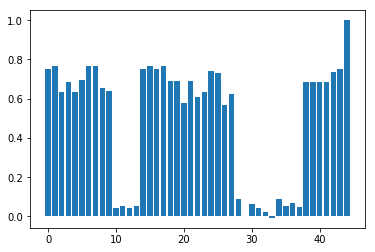

In [257]:
x = range(0, 45)
y = np.corrcoef(T, rowvar = 0)[44]
plt.bar(x, y)
plt.show()

x = []
y = []

In [258]:
T = {}

## 5. Build Model
We decide to use Xgboost to build model, here is a introduction to xgboost:   
>XGBoost is an optimized distributed gradient boosting library designed to be highly efficient, flexible and portable. It implements machine learning algorithms under the Gradient Boosting framework. XGBoost provides a parallel tree boosting (also known as GBDT, GBM) that solve many data science problems in a fast and accurate way. The same code runs on major distributed environment (Hadoop, SGE, MPI) and can solve problems beyond billions of examples.                 
Github: https://github.com/dmlc/xgboost

### 5.1 Zscore Algorithm
Zscore It is a method that can increase the data characteristic information and can normalize data, after this algorithm processed your model will restrain faster.

In [188]:
featureList = []
for i in range(0, len(train[0])):
    featureList.append([])

for row in train:
    for i in range(0, len(row)):
        featureList[i].append(row[i])

for row in test:
    for i in range(0, len(row)):
        featureList[i].append(row[i])

avgList = []
devList = []

for i in range(0, len(featureList)):
    avgList.append(np.average(featureList[i]))
    devList.append(np.std(featureList[i]))

for row in train:
    for i in range(0, len(row)):
        row[i] = (row[i] - avgList[i]) / devList[i]

for row in test:
    for i in range(0, len(row)):
        row[i] = (row[i] - avgList[i]) / devList[i]

### 5.2 Objective Function && Evaluation Function
Xgboost supports custom objective function and elaluation function, the default function is not MAPE funtion ,so we have to make it ourselves.   
The hess matrix we define 1/abs(pre-real) but then i find a more effctive method to define it.

In [259]:
def mapeObj(preds, dtrain):
    gaps = dtrain.get_label()
    grad = np.sign(preds - gaps) / gaps
    hess = []
    for i in range(0, len(gaps)):
        temp = 1 / abs(preds[i] - gaps[i])
        hess.append(temp)
    hess = np.array(hess)
    for i in range(0, len(gaps)):
        if gaps[i] == 0:
            grad[i] = 0
            hess[i] = 0
    return grad, hess


def mapeEval(preds, dtrain):
    label = dtrain.get_label()
    error = []
    for i in range(0, len(label)):
        value = abs(label[i] - preds[i]) / label[i]
        error.append(value)
    error = np.array(error)
    err = np.mean(error)
    return 'error', float(err)

### 5.3 Model Test
#### (A)Param List
Through repeat the tests and modifications, we find the best parameters

In [260]:
param = {'max_depth': 7, 'eta': 0.2, 'silent': 1, 'nthread': 4, \
             'colsample_bytree': 0.5, 'min_child_weight': 8, 'subsample': 0.7, \
             'num_parallel_tree': 5}
num_round = 10000

#### (B) Bulid Model

In [ ]:
import xgboost
xgbTrain = xgboost.DMatrix(train, label=label)
xgbVal = xgboost.DMatrix(test, label=real)

watchlist = [(xgbTrain, 'train'),(xgbVal, 'eval')]
modle = xgboost.train(param, xgbTrain, num_round, watchlist, obj=mapeObj, feval=mapeEval, early_stopping_rounds=50)

c:\users\xuechuanyu\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in true_divide
  


[0]	train-error:0.884749	eval-error:0.88749
Multiple eval metrics have been passed: 'eval-error' will be used for early stopping.

Will train until eval-error hasn't improved in 50 rounds.
[1]	train-error:0.859334	eval-error:0.862842
[2]	train-error:0.835883	eval-error:0.840056
[3]	train-error:0.814236	eval-error:0.81912
[4]	train-error:0.794306	eval-error:0.799823
[5]	train-error:0.775976	eval-error:0.782086
[6]	train-error:0.759255	eval-error:0.765895
[7]	train-error:0.743644	eval-error:0.750755
[8]	train-error:0.729156	eval-error:0.736725
[9]	train-error:0.715769	eval-error:0.723804
[10]	train-error:0.703276	eval-error:0.711729
[11]	train-error:0.691585	eval-error:0.700442
[12]	train-error:0.680392	eval-error:0.689631
[13]	train-error:0.669944	eval-error:0.679543
[14]	train-error:0.659912	eval-error:0.669833
[15]	train-error:0.650561	eval-error:0.660839
[16]	train-error:0.641652	eval-error:0.652254
[17]	train-error:0.633225	eval-error:0.644128
[18]	train-error:0.625104	eval-error:0.

[175]	train-error:0.343111	eval-error:0.368101
[176]	train-error:0.342639	eval-error:0.367673
[177]	train-error:0.342192	eval-error:0.367266
[178]	train-error:0.341733	eval-error:0.366851
[179]	train-error:0.341272	eval-error:0.366436
[180]	train-error:0.340847	eval-error:0.366051
[181]	train-error:0.340423	eval-error:0.365671
[182]	train-error:0.340006	eval-error:0.365306
[183]	train-error:0.339582	eval-error:0.36492
[184]	train-error:0.339148	eval-error:0.364527
[185]	train-error:0.338719	eval-error:0.364145
[186]	train-error:0.338289	eval-error:0.363755
[187]	train-error:0.337918	eval-error:0.363431
[188]	train-error:0.337497	eval-error:0.363058
[189]	train-error:0.337076	eval-error:0.362689
[190]	train-error:0.336687	eval-error:0.362338
[191]	train-error:0.336291	eval-error:0.361983
[192]	train-error:0.335907	eval-error:0.361633
[193]	train-error:0.335537	eval-error:0.36131
[194]	train-error:0.335166	eval-error:0.360982
[195]	train-error:0.334772	eval-error:0.360635
[196]	train-err

[351]	train-error:0.299608	eval-error:0.330169
[352]	train-error:0.299462	eval-error:0.330049
[353]	train-error:0.299314	eval-error:0.329921
[354]	train-error:0.299161	eval-error:0.329796
[355]	train-error:0.299011	eval-error:0.329671
[356]	train-error:0.298861	eval-error:0.32955
[357]	train-error:0.298712	eval-error:0.329426
[358]	train-error:0.298565	eval-error:0.329307
[359]	train-error:0.298419	eval-error:0.329184
[360]	train-error:0.298271	eval-error:0.329059
[361]	train-error:0.298135	eval-error:0.328943
[362]	train-error:0.298008	eval-error:0.328843
[363]	train-error:0.29788	eval-error:0.328737
[364]	train-error:0.297747	eval-error:0.328629
[365]	train-error:0.297607	eval-error:0.32851
[366]	train-error:0.297462	eval-error:0.328384
[367]	train-error:0.297318	eval-error:0.328265
[368]	train-error:0.29718	eval-error:0.328148
[369]	train-error:0.297038	eval-error:0.328028
[370]	train-error:0.296905	eval-error:0.327917
[371]	train-error:0.296776	eval-error:0.32781
[372]	train-error:

[527]	train-error:0.281167	eval-error:0.315266
[528]	train-error:0.281101	eval-error:0.315214
[529]	train-error:0.281034	eval-error:0.315163
[530]	train-error:0.280964	eval-error:0.315109
[531]	train-error:0.280897	eval-error:0.315054
[532]	train-error:0.280824	eval-error:0.314993
[533]	train-error:0.280756	eval-error:0.314937
[534]	train-error:0.280685	eval-error:0.314884
[535]	train-error:0.28061	eval-error:0.314827
[536]	train-error:0.280539	eval-error:0.314772
[537]	train-error:0.280473	eval-error:0.314728
[538]	train-error:0.280407	eval-error:0.314676
[539]	train-error:0.28034	eval-error:0.314622
[540]	train-error:0.280267	eval-error:0.314568
[541]	train-error:0.280199	eval-error:0.314511
[542]	train-error:0.280126	eval-error:0.314456
[543]	train-error:0.280053	eval-error:0.314404
[544]	train-error:0.279981	eval-error:0.314348
[545]	train-error:0.279909	eval-error:0.314298
[546]	train-error:0.279834	eval-error:0.314238
[547]	train-error:0.279763	eval-error:0.31419
[548]	train-erro

[703]	train-error:0.271066	eval-error:0.307838
[704]	train-error:0.27102	eval-error:0.307807
[705]	train-error:0.270971	eval-error:0.307773
[706]	train-error:0.270923	eval-error:0.30774
[707]	train-error:0.270874	eval-error:0.307707
[708]	train-error:0.270825	eval-error:0.307672
[709]	train-error:0.270776	eval-error:0.307639
[710]	train-error:0.270731	eval-error:0.307606
[711]	train-error:0.270682	eval-error:0.307573
[712]	train-error:0.270631	eval-error:0.307537
[713]	train-error:0.270585	eval-error:0.307502
[714]	train-error:0.27054	eval-error:0.30747
[715]	train-error:0.270492	eval-error:0.307438
[716]	train-error:0.270449	eval-error:0.30741
[717]	train-error:0.270406	eval-error:0.307381
[718]	train-error:0.270362	eval-error:0.30735
[719]	train-error:0.270316	eval-error:0.307319
[720]	train-error:0.270272	eval-error:0.307287
[721]	train-error:0.27023	eval-error:0.307256
[722]	train-error:0.270185	eval-error:0.307225
[723]	train-error:0.27014	eval-error:0.307193
[724]	train-error:0.2

[879]	train-error:0.264417	eval-error:0.303444
[880]	train-error:0.264384	eval-error:0.303423
[881]	train-error:0.26435	eval-error:0.303403
[882]	train-error:0.264316	eval-error:0.303381
[883]	train-error:0.264283	eval-error:0.303361
[884]	train-error:0.264253	eval-error:0.303341
[885]	train-error:0.264221	eval-error:0.303324
[886]	train-error:0.264187	eval-error:0.303306
[887]	train-error:0.264155	eval-error:0.303285
[888]	train-error:0.264121	eval-error:0.303263
[889]	train-error:0.264089	eval-error:0.303245
[890]	train-error:0.264056	eval-error:0.303224
[891]	train-error:0.264023	eval-error:0.303203
[892]	train-error:0.263989	eval-error:0.303182
[893]	train-error:0.263953	eval-error:0.303156
[894]	train-error:0.263923	eval-error:0.303135
[895]	train-error:0.263892	eval-error:0.303117
[896]	train-error:0.263862	eval-error:0.303099
[897]	train-error:0.263829	eval-error:0.303079
[898]	train-error:0.263798	eval-error:0.303057
[899]	train-error:0.263767	eval-error:0.303039
[900]	train-er

[1054]	train-error:0.259608	eval-error:0.300719
[1055]	train-error:0.259585	eval-error:0.300702
[1056]	train-error:0.25956	eval-error:0.300693
[1057]	train-error:0.25954	eval-error:0.300681
[1058]	train-error:0.259517	eval-error:0.30067
[1059]	train-error:0.259492	eval-error:0.300656
[1060]	train-error:0.259468	eval-error:0.300645
[1061]	train-error:0.259448	eval-error:0.300636
[1062]	train-error:0.259426	eval-error:0.300629
[1063]	train-error:0.259407	eval-error:0.300616
[1064]	train-error:0.259384	eval-error:0.300603
[1065]	train-error:0.259362	eval-error:0.300589
[1066]	train-error:0.259339	eval-error:0.300577
[1067]	train-error:0.259318	eval-error:0.300566
[1068]	train-error:0.259296	eval-error:0.300554
[1069]	train-error:0.259273	eval-error:0.300541
[1070]	train-error:0.259248	eval-error:0.300526
[1071]	train-error:0.259221	eval-error:0.300512
[1072]	train-error:0.259197	eval-error:0.3005
[1073]	train-error:0.259172	eval-error:0.300487
[1074]	train-error:0.259147	eval-error:0.3004

[1226]	train-error:0.255951	eval-error:0.298959
[1227]	train-error:0.255931	eval-error:0.298949
[1228]	train-error:0.255909	eval-error:0.298938
[1229]	train-error:0.255888	eval-error:0.298929
[1230]	train-error:0.255868	eval-error:0.298913
[1231]	train-error:0.255848	eval-error:0.298902
[1232]	train-error:0.255828	eval-error:0.298892
[1233]	train-error:0.255809	eval-error:0.298882
[1234]	train-error:0.255789	eval-error:0.298873
[1235]	train-error:0.25577	eval-error:0.298864
[1236]	train-error:0.255751	eval-error:0.298856
[1237]	train-error:0.255731	eval-error:0.298845
[1238]	train-error:0.255712	eval-error:0.298835
[1239]	train-error:0.255693	eval-error:0.298827
[1240]	train-error:0.255677	eval-error:0.298818
[1241]	train-error:0.25566	eval-error:0.29881
[1242]	train-error:0.255639	eval-error:0.298793
[1243]	train-error:0.255618	eval-error:0.298786
[1244]	train-error:0.255601	eval-error:0.298779
[1245]	train-error:0.255582	eval-error:0.298769
[1246]	train-error:0.255564	eval-error:0.29

[1398]	train-error:0.253008	eval-error:0.297746
[1399]	train-error:0.252994	eval-error:0.29774
[1400]	train-error:0.252979	eval-error:0.297733
[1401]	train-error:0.252964	eval-error:0.297726
[1402]	train-error:0.252948	eval-error:0.297718
[1403]	train-error:0.252932	eval-error:0.297713
[1404]	train-error:0.252918	eval-error:0.297708
[1405]	train-error:0.252904	eval-error:0.297699
[1406]	train-error:0.252891	eval-error:0.297701
[1407]	train-error:0.252876	eval-error:0.297697
[1408]	train-error:0.252862	eval-error:0.297694
[1409]	train-error:0.25285	eval-error:0.297694
[1410]	train-error:0.252836	eval-error:0.297688
[1411]	train-error:0.25282	eval-error:0.297684
[1412]	train-error:0.252805	eval-error:0.297678
[1413]	train-error:0.252792	eval-error:0.297674
[1414]	train-error:0.252776	eval-error:0.297668
[1415]	train-error:0.25276	eval-error:0.297662
[1416]	train-error:0.252745	eval-error:0.297657
[1417]	train-error:0.252733	eval-error:0.297652
[1418]	train-error:0.252718	eval-error:0.297

[1570]	train-error:0.250706	eval-error:0.296949
[1571]	train-error:0.250693	eval-error:0.296947
[1572]	train-error:0.250679	eval-error:0.296943
[1573]	train-error:0.250667	eval-error:0.296939
[1574]	train-error:0.250654	eval-error:0.296934
[1575]	train-error:0.250642	eval-error:0.29693
[1576]	train-error:0.250629	eval-error:0.296926
[1577]	train-error:0.250616	eval-error:0.296922
[1578]	train-error:0.250604	eval-error:0.296916
[1579]	train-error:0.250591	eval-error:0.296912
[1580]	train-error:0.250578	eval-error:0.296907
[1581]	train-error:0.250565	eval-error:0.296904
[1582]	train-error:0.250552	eval-error:0.296899
[1583]	train-error:0.250538	eval-error:0.296896
[1584]	train-error:0.250526	eval-error:0.296892
[1585]	train-error:0.250514	eval-error:0.296889
[1586]	train-error:0.2505	eval-error:0.296885
[1587]	train-error:0.250486	eval-error:0.296884
[1588]	train-error:0.250472	eval-error:0.296881
[1589]	train-error:0.25046	eval-error:0.296878
[1590]	train-error:0.250446	eval-error:0.296

The train-error is the MAPE of train data and test-error is the MAPE of your test data, when eval-error is little enough, you should stop the iteration.

## Summary
During the long processing, we get the rank 28/1716
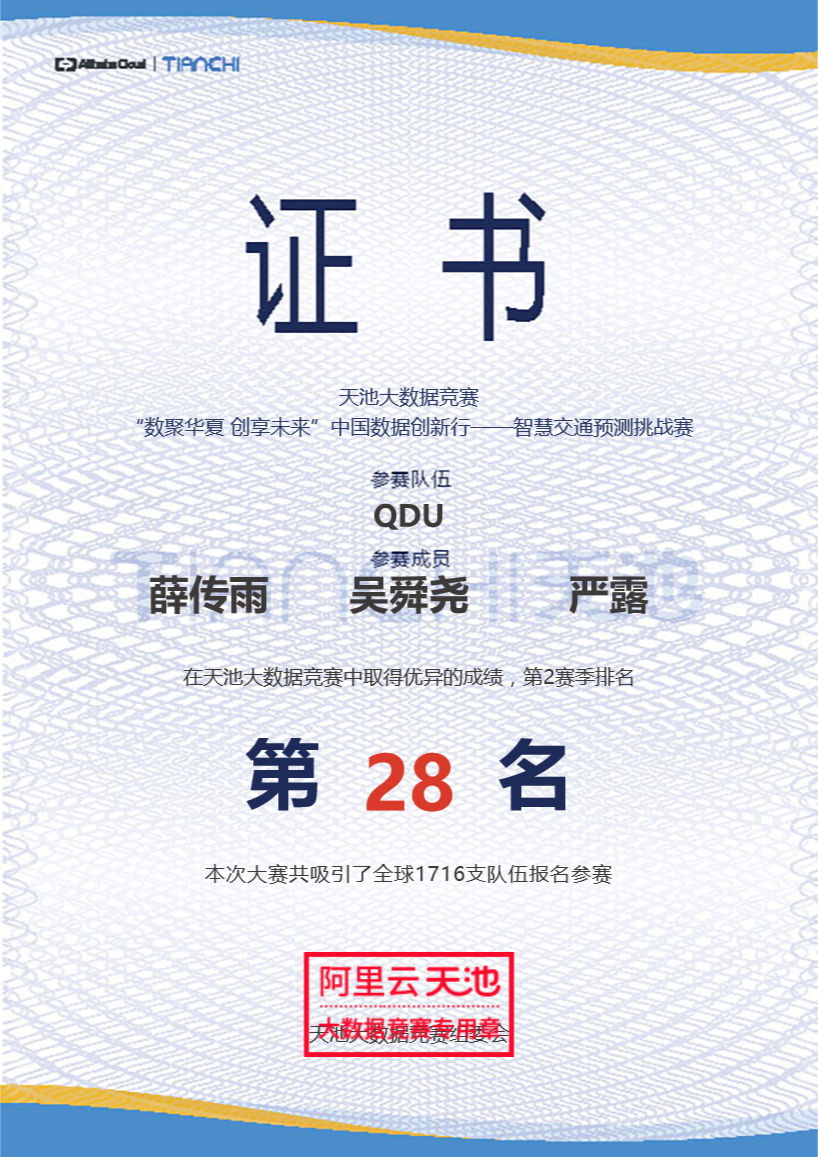